In [1]:
from pandas import HDFStore,DataFrame
import pandas as pd

store = HDFStore('/home/raz/store.h5')

pdata = pd.read_hdf(store)
pdata = pdata.sort_values('Timestamp')

catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
print(len(NumFeatures), "Continuous Features \n", NumFeatures)
print("\n \n")
print(len(catFeatures), "Categorical features \n\n\n", catFeatures)


NumFeatures.remove("Timestamp")
print("\n \n")

print(len(NumFeatures), "Upadated List of Continuous Features \n", NumFeatures)
print("\n \n")

Opening /home/raz/store.h5 in read-only mode
52 Continuous Features 
 ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

 

1 Categorical features 


 ['EVENT']

 

51 Upadated List of Continuous Features 
 ['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT50

In [2]:
store.close()

In [3]:
pdata['hod'] = pdata['Timestamp'].dt.hour

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None

In [5]:
bool_cols = [col for col in pdata 
             if pdata[[col]].dropna().isin([0, 1]).all().values]

In [6]:
pdata[bool_cols].describe()

,P202,P401,P404,P502,P601,P603
count,946719.0,946719.0,946719.0,946719.0,946719.0,946719.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
pdata.drop(bool_cols, axis = 1, inplace = True)
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)

In [8]:
catFeatures = []
for col in pdata[NumFeatures]:
    if(pdata[[col]].dropna().isin([1, 2]).all().values):
        print(col)
        catFeatures.append(col)
        pdata[col] = pdata[col].astype('category')

P101
P102
P201
P203
P204
P205
P206
P301
P302
P402
P403
UV401
P501
P602


In [9]:
NumFeatures = [x for x in NumFeatures if x not in catFeatures ]
len(NumFeatures) + len(catFeatures) + len(bool_cols)

53

In [10]:
X_cat = pd.get_dummies(pdata , columns=catFeatures[1:])

In [11]:
X_cat.columns

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', 'MV303', 'MV304', 'AIT401', 'AIT402', 'FIT401', 'LIT401',
       'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
       'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'EVENT', 'hod',
       'P102_1', 'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1',
       'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2',
       'P302_1', 'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1',
       'UV401_2', 'P501_1', 'P501_2', 'P602_1', 'P602_2'],
      dtype='object')

In [12]:
dummies = ['P102_1', 'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1',
'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2', 'P302_1', 'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1',
'UV401_2', 'P501_1', 'P501_2', 'P602_1', 'P602_2']

In [13]:
y = pdata['EVENT'] == 'Attack'

## Removing Top n Features 

In [15]:
from time import time
from sklearn.model_selection import train_test_split

X = X_cat[NumFeatures[1:] + dummies]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

CPU times: user 40min 29s, sys: 5.38 s, total: 40min 35s
Wall time: 10min 14s


In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print (confusion_matrix(y_test, clf_xgb1.predict(X_test)))
print (classification_report(y_test, clf_xgb1.predict(X_test)))
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))

[[223148     57]
 [   274  13201]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00    223205
       True       1.00      0.98      0.99     13475

avg / total       1.00      1.00      1.00    236680

0.99860148724


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


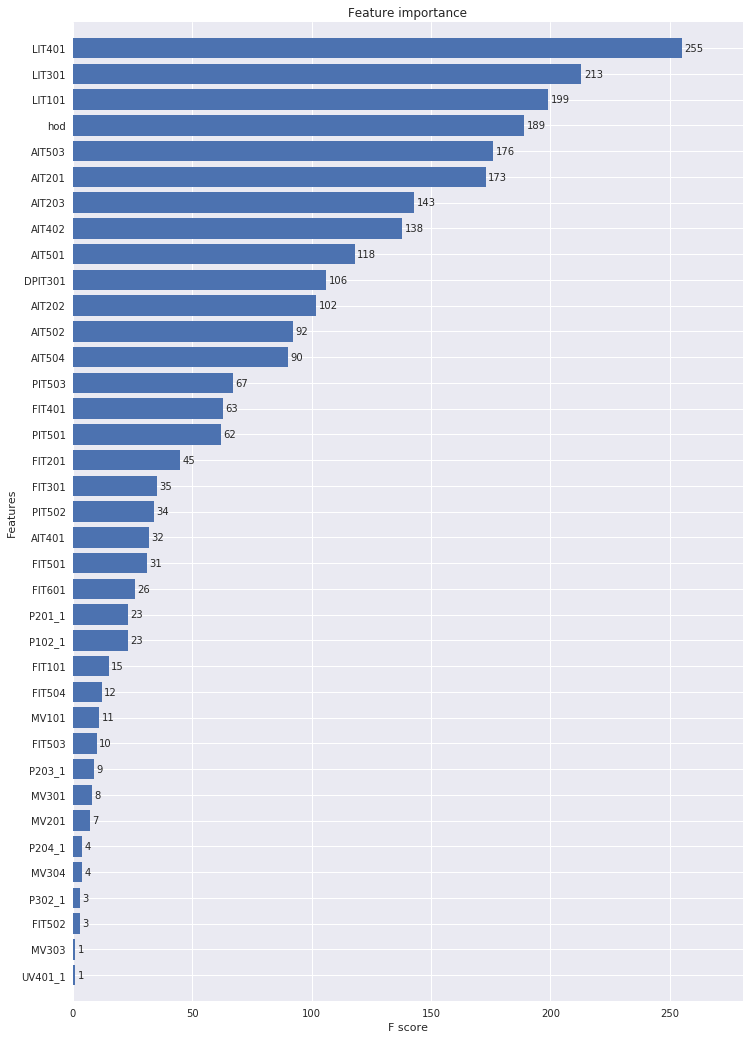

In [25]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(clf_xgb1, height=0.8, ax=ax)
plt.show()

In [26]:
X_train.columns

Index(['FIT101', 'LIT101', 'MV101', 'AIT201', 'AIT202', 'AIT203', 'FIT201',
       'MV201', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303',
       'MV304', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'hod', 'P102_1', 'P102_2', 'P201_1',
       'P201_2', 'P203_1', 'P203_2', 'P204_1', 'P204_2', 'P205_1', 'P205_2',
       'P206_1', 'P206_2', 'P301_1', 'P301_2', 'P302_1', 'P302_2', 'P402_1',
       'P402_2', 'P403_1', 'P403_2', 'UV401_1', 'UV401_2', 'P501_1', 'P501_2',
       'P602_1', 'P602_2'],
      dtype='object')

In [27]:
X1_train = X_train.drop(['LIT401','LIT301','LIT101'], axis=1)
X1_test = X_test.drop(['LIT401','LIT301','LIT101'], axis=1)

In [28]:
X1_train.columns

Index(['FIT101', 'MV101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201',
       'DPIT301', 'FIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'AIT401',
       'AIT402', 'FIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501',
       'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601',
       'hod', 'P102_1', 'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2',
       'P204_1', 'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1',
       'P301_2', 'P302_1', 'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2',
       'UV401_1', 'UV401_2', 'P501_1', 'P501_2', 'P602_1', 'P602_2'],
      dtype='object')

In [29]:
%%time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

from sklearn.model_selection import learning_curve
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1], 'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb12 = get_model(xgb, parameters, nX_train, ny_train, scoring)

NameError: name 'nX_train' is not defined

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print (confusion_matrix(y_test, clf_xgb12.predict(nX_test)))
print (classification_report(y_test, clf_xgb12.predict(nX_test)))
print (accuracy_score(y_test, clf_xgb12.predict(nX_test)))

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(clf_xgb12, height=0.8, ax=ax)
plt.show()

## Sequential Forward Selection

In [30]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
clf = GaussianNB()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 13.7 ms


In [31]:
X.shape

(946719, 58)

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=58, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3,
          n_jobs=-1)

sfs1 = sfs1.fit(X.values, y)

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.8s
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:428: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:430: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:430: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:430: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:428: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/naive_bay

[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:   45.1s finished

[2017-08-15 17:06:31] Features: 8/58 -- score: 0.98205383233[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.3s finished

[2017-08-15 17:07:16] Features: 9/58 -- score: 0.982087633372[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   43.6s finished

[2017-08-15 17:08:00] Features: 10/58 -- score: 0.982102421294[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   44.7s finished

[2017-08-15 17:08:45] Features: 11/58 -- score: 0.98211509667[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   50.4s finished

[2017-08-15 17:09:35] Features: 12/58 -- score: 0.982117209235[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: D

In [35]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,0.97536,0.0506486,"[0.945556351284, 0.999939792061, 0.9805844625]","(17,)",0.0225072,0.015915
2,0.978591,0.0408427,"[0.955576188152, 0.999939792061, 0.980258071058]","(17, 22)",0.0181497,0.0128338
3,0.981318,0.0353923,"[0.961416339749, 0.999870077605, 0.982666396258]","(32, 17, 22)",0.0157276,0.0111211
4,0.981706,0.0354787,"[0.961425846236, 0.999870077605, 0.983823026124]","(32, 17, 29, 22)",0.015766,0.0111482
5,0.981905,0.0348182,"[0.962103975613, 0.999870077605, 0.983740636051]","(32, 15, 17, 22, 29)",0.0154725,0.0109407
6,0.981977,0.0346069,"[0.962164183361, 0.99965142772, 0.984114560227]","(32, 15, 16, 17, 22, 29)",0.0153786,0.0108743
7,0.982021,0.0346568,"[0.962164183361, 0.999698960304, 0.984200119149]","(32, 33, 15, 16, 17, 22, 29)",0.0154008,0.01089
8,0.982054,0.0347008,"[0.962164183361, 0.999743324049, 0.984253989581]","(32, 33, 38, 15, 16, 17, 22, 29)",0.0154203,0.0109038
9,0.982088,0.0347294,"[0.962161014532, 0.999762337082, 0.984339548502]","(15, 16, 17, 22, 26, 29, 32, 33, 38)",0.015433,0.0109128
10,0.982102,0.0347301,"[0.962173689848, 0.999775012438, 0.984358561596]","(15, 16, 17, 22, 26, 29, 32, 33, 38, 48)",0.0154334,0.010913


In [91]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T[56:58]['feature_idx']

57    (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
58    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Name: feature_idx, dtype: object

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


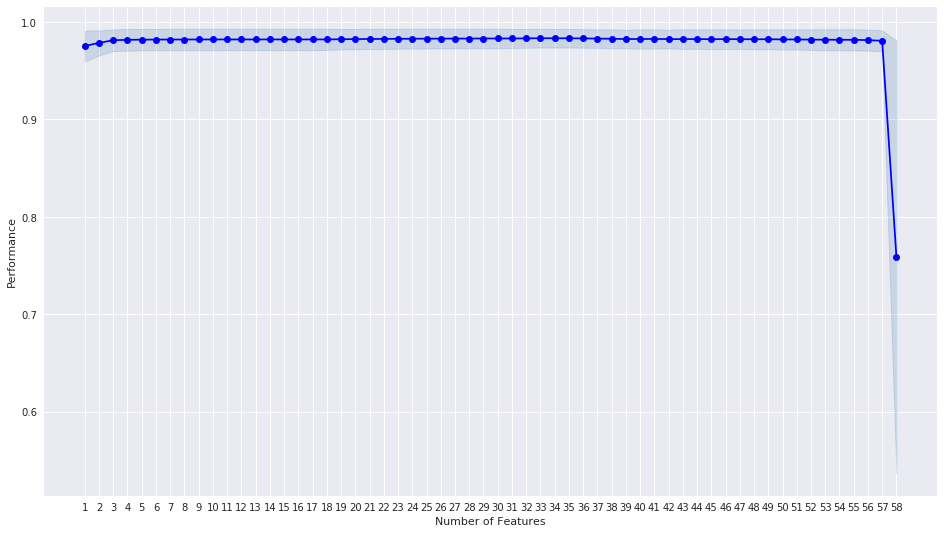

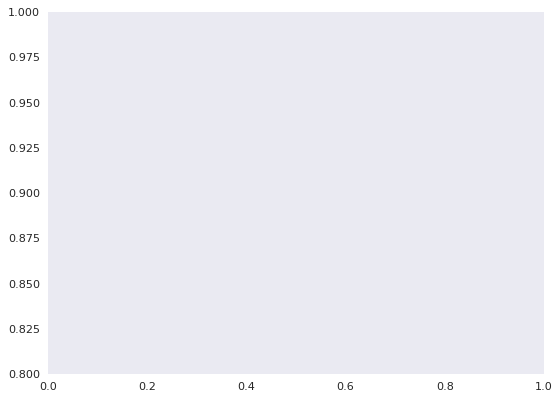

In [38]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.figure(num=10, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.ylim([0.8, 1])
plt.rcParams["figure.figsize"] = [16,9]
plt.grid()
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


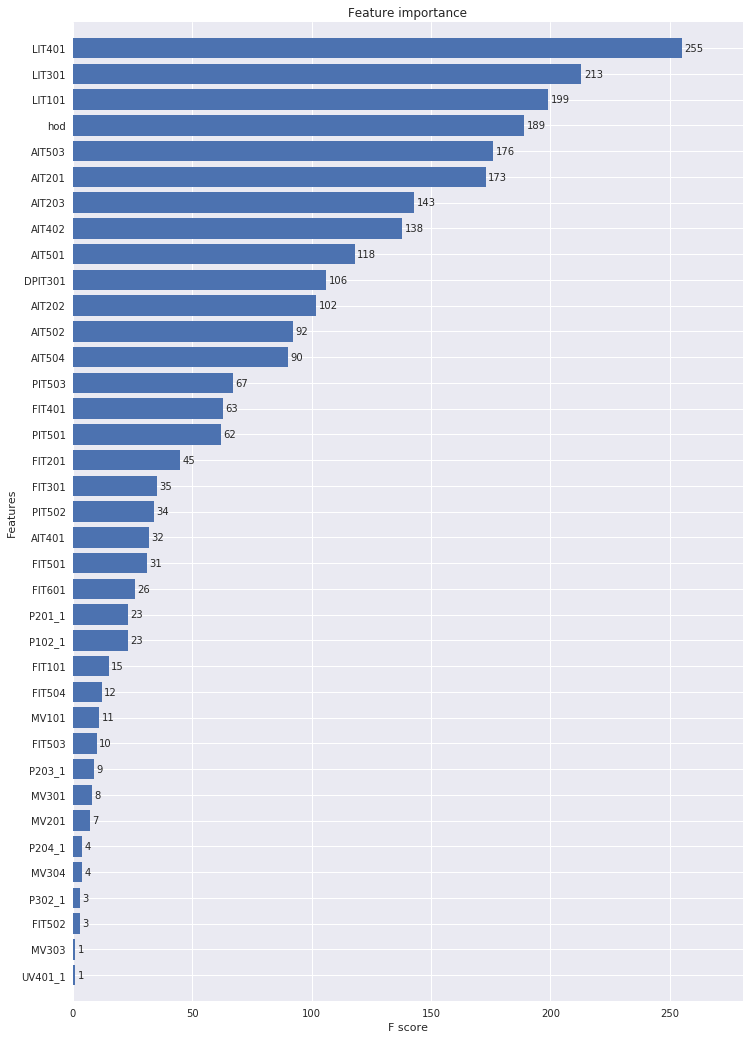

In [42]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(clf_xgb1, height=0.8, ax=ax)
plt.show()

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

In [44]:
clf.feature_importances_  

array([  9.09184304e-03,   3.39612535e-02,   5.63073150e-03,
         2.04504374e-02,   1.73976266e-02,   1.03509109e-02,
         1.00494413e-02,   2.74533342e-03,   1.94001422e-02,
         3.92443829e-03,   4.84484774e-02,   2.16727051e-03,
         3.13444781e-03,   1.26851124e-03,   1.01441872e-02,
         7.59047003e-03,   6.79072117e-02,   6.51433377e-02,
         2.27172479e-02,   1.31988985e-02,   3.94256294e-02,
         1.37673040e-02,   1.71839104e-02,   3.80719359e-02,
         7.40335637e-04,   3.25560573e-03,   1.14740899e-01,
         1.98053100e-02,   6.63927925e-03,   9.30004165e-03,
         6.53707760e-03,   1.66565668e-02,   3.96490023e-02,
         7.97226868e-03,   7.30443536e-04,   5.35071990e-04,
         2.88184504e-03,   1.65038932e-03,   2.12690754e-04,
         5.26968224e-04,   1.62626108e-03,   1.81760821e-03,
         1.87860846e-04,   0.00000000e+00,   9.15450345e-04,
         1.47563004e-03,   1.39130602e-02,   2.86422650e-03,
         4.25815817e-02,

In [45]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X_new, y, random_state=42, stratify=y, test_size=0.25)

# Naive Bayes on entire data with stratification on 'hod'

In [57]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
clf = GaussianNB()
clf.fit(nX_train, ny_train)

print(clf)
# make predictions
ny_p1 = clf.predict(nX_test)
# summarize the fit of the model
print(metrics.classification_report(ny_test, ny_p1))
print(metrics.confusion_matrix(ny_test, ny_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.98      0.99      0.99    223205
       True       0.87      0.70      0.77     13475

avg / total       0.98      0.98      0.98    236680

[[221755   1450]
 [  4074   9401]]
CPU times: user 644 ms, sys: 44 ms, total: 688 ms
Wall time: 682 ms


# Splitting Dataframe based on 'hod' and then stratifying on 'EVENT'

In [58]:
compData = X
compData['EVENT'] = pdata['EVENT'] == 'Attack'

In [59]:
compData.EVENT

449919    False
449920    False
449921    False
449922    False
449923    False
449924    False
449925    False
449926    False
449927    False
449928    False
449929    False
449930    False
449931    False
449932    False
449933    False
449934    False
449935    False
449936    False
449937    False
449938    False
449939    False
449940    False
449941    False
449942    False
449943    False
449944    False
449945    False
449946    False
449947    False
449948    False
          ...  
449889    False
449890    False
449891    False
449892    False
449893    False
449894    False
449895    False
449896    False
449897    False
449898    False
449899    False
449900    False
449901    False
449902    False
449903    False
449904    False
449905    False
449906    False
449907    False
449908    False
449909    False
449910    False
449911    False
449912    False
449913    False
449914    False
449915    False
449916    False
449917    False
449918    False
Name: EVENT, Length: 946

In [60]:
compData.sort_values(['hod'], inplace=True)

In [61]:
data0to4 = compData[compData.hod < 5]
data4to8 = compData[(compData.hod >4) & (compData.hod < 9)]
data8to12 = compData[(compData.hod >8) & (compData.hod < 13)]
data12t016 = compData[(compData.hod >12) & (compData.hod < 17)]
data16to20 = compData[(compData.hod >16) & (compData.hod < 21)]
data20to24 = compData[compData.hod >20]

In [62]:
print(len(data0to4))
print(len(data4to8))
print(len(data8to12))
print(len(data12t016))
print(len(data16to20))
print(len(data20to24))
print(len(data0to4)+len(data4to8)+len(data8to12)+len(data12t016)+len(data16to20)+len(data20to24))
print(len(compData))

198000
158400
158400
154800
158400
118719
946719
946719


In [63]:
from time import time
from sklearn.model_selection import train_test_split

datatrain1, datatest1, ytrain1, ytest1 = train_test_split(data0to4.drop(['EVENT'],axis =1),data0to4['EVENT'], random_state=42, stratify=data0to4['EVENT'], test_size=0.25)
datatrain2, datatest2, ytrain2, ytest2 = train_test_split(data4to8.drop(['EVENT'],axis =1), data4to8['EVENT'], random_state=42, stratify=data4to8['EVENT'], test_size=0.25)
datatrain3, datatest3, ytrain3, ytest3 = train_test_split(data8to12.drop(['EVENT'],axis =1), data8to12['EVENT'], random_state=42, stratify=data8to12['EVENT'], test_size=0.25)
datatrain4, datatest4, ytrain4, ytest4 = train_test_split(data12t016.drop(['EVENT'],axis =1), data12t016['EVENT'], random_state=42, stratify=data12t016['EVENT'], test_size=0.25)
datatrain5, datatest5, ytrain5, ytest5 = train_test_split(data16to20.drop(['EVENT'],axis =1), data16to20['EVENT'], random_state=42, stratify=data16to20['EVENT'], test_size=0.25)
datatrain6, datatest6, ytrain6, ytest6 = train_test_split(data20to24.drop(['EVENT'],axis =1), data20to24['EVENT'], random_state=42, stratify=data20to24['EVENT'], test_size=0.25)


# Naive Bayes

In [64]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest1)
# summarize the fit of the model
print(metrics.classification_report(ytest1, y_p1))
print(metrics.confusion_matrix(ytest1, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.98      1.00      0.99     45983
       True       1.00      0.77      0.87      3517

avg / total       0.98      0.98      0.98     49500

[[45983     0]
 [  814  2703]]


In [65]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest2)
# summarize the fit of the model
print(metrics.classification_report(ytest2, y_p1))
print(metrics.confusion_matrix(ytest2, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       1.00      1.00      1.00     36000
       True       1.00      1.00      1.00      3600

avg / total       1.00      1.00      1.00     39600

[[36000     0]
 [    0  3600]]


In [66]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest3)
# summarize the fit of the model
print(metrics.classification_report(ytest3, y_p1))
print(metrics.confusion_matrix(ytest3, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.96      1.00      0.98     35892
       True       0.98      0.62      0.76      3708

avg / total       0.96      0.96      0.96     39600

[[35855    37]
 [ 1420  2288]]


In [67]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest4)
# summarize the fit of the model
print(metrics.classification_report(ytest4, y_p1))
print(metrics.confusion_matrix(ytest4, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.97      1.00      0.98     37243
       True       0.96      0.13      0.22      1457

avg / total       0.97      0.97      0.95     38700

[[37236     7]
 [ 1272   185]]


In [76]:
clf = GaussianNB()
clf.fit(datatrain4, ytrain4)

print(clf)
# make predictions
y_p1 = clf.predict(datatest5)
# summarize the fit of the model
print(metrics.classification_report(ytest5, y_p1))
print(metrics.confusion_matrix(ytest5, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.99      0.59      0.74     38750
       True       0.03      0.66      0.06       850

avg / total       0.97      0.59      0.72     39600

[[22834 15916]
 [  293   557]]


In [69]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest6)
# summarize the fit of the model
print(metrics.classification_report(ytest6, y_p1))
print(metrics.confusion_matrix(ytest6, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.99      1.00      1.00     29337
       True       0.96      0.32      0.48       343

avg / total       0.99      0.99      0.99     29680

[[29333     4]
 [  234   109]]


# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic = LogisticRegression()
logistic.fit(datatrain1, ytrain1)
y_p1_lr = logistic.predict(datatest1)

print (accuracy_score(ytest1, y_p1_lr))
print (classification_report(ytest1, y_p1_lr))

0.998080808081
             precision    recall  f1-score   support

      False       1.00      1.00      1.00     45983
       True       0.99      0.99      0.99      3517

avg / total       1.00      1.00      1.00     49500



In [71]:
logistic = LogisticRegression()
logistic.fit(datatrain1, ytrain1)
y_p1_lr = logistic.predict(datatest2)

print (accuracy_score(ytest2, y_p1_lr))
print (classification_report(ytest2, y_p1_lr))

0.811843434343
             precision    recall  f1-score   support

      False       1.00      0.79      0.88     36000
       True       0.33      1.00      0.49      3600

avg / total       0.94      0.81      0.85     39600



In [72]:
logistic = LogisticRegression()
logistic.fit(datatrain2, ytrain2)
y_p1_lr = logistic.predict(datatest3)

print (accuracy_score(ytest3, y_p1_lr))
print (classification_report(ytest3, y_p1_lr))

0.953055555556
             precision    recall  f1-score   support

      False       0.96      0.99      0.97     35892
       True       0.91      0.55      0.69      3708

avg / total       0.95      0.95      0.95     39600



In [73]:
logistic = LogisticRegression()
logistic.fit(datatrain3, ytrain3)
y_p1_lr = logistic.predict(datatest4)

print (accuracy_score(ytest4, y_p1_lr))
print (classification_report(ytest4, y_p1_lr))

0.930620155039
             precision    recall  f1-score   support

      False       0.96      0.96      0.96     37243
       True       0.09      0.10      0.09      1457

avg / total       0.93      0.93      0.93     38700



In [74]:
logistic = LogisticRegression()
logistic.fit(datatrain4, ytrain4)
y_p1_lr = logistic.predict(datatest5)

print (accuracy_score(ytest5, y_p1_lr))
print (classification_report(ytest5, y_p1_lr))

0.986944444444
             precision    recall  f1-score   support

      False       0.99      1.00      0.99     38750
       True       0.96      0.41      0.57       850

avg / total       0.99      0.99      0.98     39600



In [75]:
logistic = LogisticRegression()
logistic.fit(datatrain5, ytrain5)
y_p1_lr = logistic.predict(datatest6)

print (accuracy_score(ytest6, y_p1_lr))
print (classification_report(ytest6, y_p1_lr))

0.987836927224
             precision    recall  f1-score   support

      False       0.99      1.00      0.99     29337
       True       0.00      0.00      0.00       343

avg / total       0.98      0.99      0.98     29680



In [ ]:
datatest6.shape

# XGBoost

In [ ]:
%%time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

from sklearn.model_selection import learning_curve
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1], 'reg_alpha':[3.0], 'reg_lambda': [4.0]}


In [ ]:
clf_xgb1 = get_model(xgb, parameters, datatrain1, ytrain1, scoring)
print (confusion_matrix(ytest1, clf_xgb1.predict(datatest1)))
print (classification_report(ytest1, clf_xgb1.predict(datatest1)))
print (accuracy_score(ytest1, clf_xgb1.predict(datatest1)))